In [58]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np
import seaborn

In [1]:
!ls ../data

test.csv
train.csv


In [35]:
df = pd.DataFrame.from_csv('../data/train.csv')
df['Age']=pd.to_numeric(df['Age'],errors='coerce')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


([<matplotlib.patches.Wedge at 0xabf9dd0>,
 [<matplotlib.text.Text at 0xac71150>, <matplotlib.text.Text at 0xac71670>])

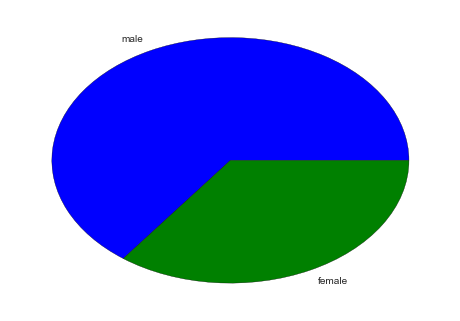

In [60]:
plt.pie(df['Sex'].value_counts(),labels=df['Sex'].value_counts().index)

(array([  64.,  115.,  230.,  155.,   86.,   42.,   17.,    5.,    0.,  177.]),
 array([   0.42 ,   10.378,   20.336,   30.294,   40.252,   50.21 ,
          60.168,   70.126,   80.084,   90.042,  100.   ]),
 <a list of 10 Patch objects>)

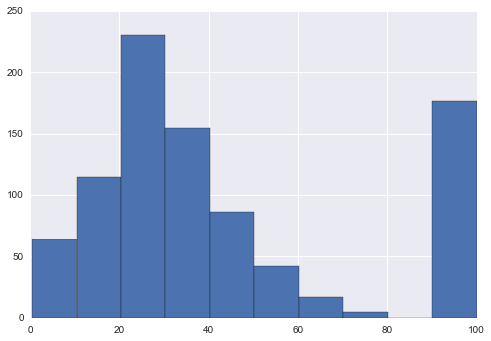

In [61]:
plt.hist(df.Age.fillna(100).values)

In [38]:
pd.isnull(df.Age).sum()/float(df.shape[0])

0.19865319865319866

In [45]:
pd.crosstab(df['Survived'],[df['Sex']])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [56]:
pd.crosstab(df['Survived'],[df['Sex'],df['Age'].apply(lambda x: round(x/10.0)*10 if x>0 else x)])

Sex      female                               male                           \
Age        0.0  10.0 20.0 30.0 40.0 50.0 60.0 0.0  10.0 20.0 30.0 40.0 50.0   
Survived                                                                      
0             5   10   17   16    9    6    1    8   10  110  107   60   37   
1            12   12   61   47   36   20    9   15    6   12   31   15   10   

Sex                      
Age      60.0 70.0 80.0  
Survived                 
0          18   10    0  
1           3    0    1

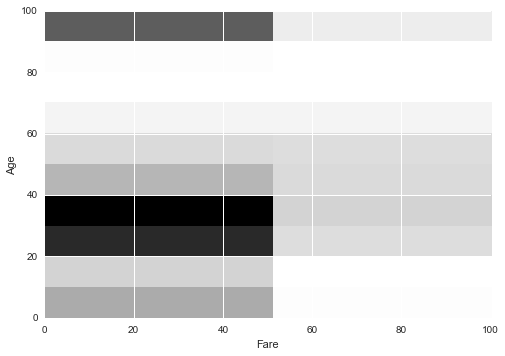

In [80]:
plt.figure()
plt.hist2d(\
           df['Fare'][df['Survived']==1],\
           df['Age'][df['Survived']==1].apply(lambda x: round(x/10.0)*10 if x>0 else 100)\
          )
plt.xlim(0, 100);
plt.ylim(0, 100);
plt.ylabel('Age')
plt.xlabel('Fare')

In [86]:
pd.crosstab(df['Survived'],[df['Cabin'].dropna().apply(lambda x:str(x)[0])])

Cabin,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0,8,12,24,8,8,5,2,1
1,7,35,35,25,24,8,2,0
